In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

###  **Loading the data**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df_url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df_titanic = pd.read_csv(df_url)
#dropping the columns which are not required for analyzing the data
df_titanic = df_titanic.drop(["PassengerId","Name","Ticket","Cabin","Fare"],axis=1) 

In [ ]:
print(len(df_titanic))
df_titanic.head(891)

891


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


##  **Data Visualisation**

Number of people who did not survive =  549
Number of people who did survive =  342


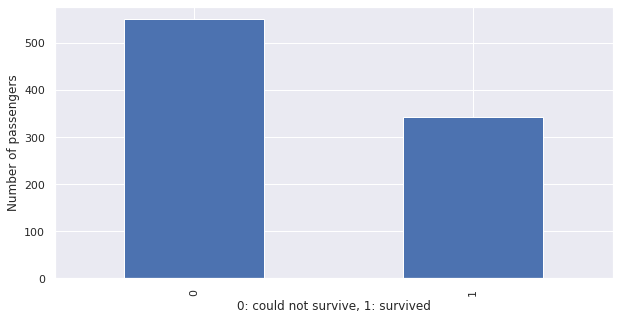

In [ ]:
df_titanic['Survived'].value_counts().plot(kind='bar')
plt.xlabel('0: could not survive, 1: survived')
plt.ylabel('Number of passengers') 
print("Number of people who did not survive = ", len(df_titanic[df_titanic.Survived==0]))
print("Number of people who did survive = ", len(df_titanic[df_titanic.Survived==1]))

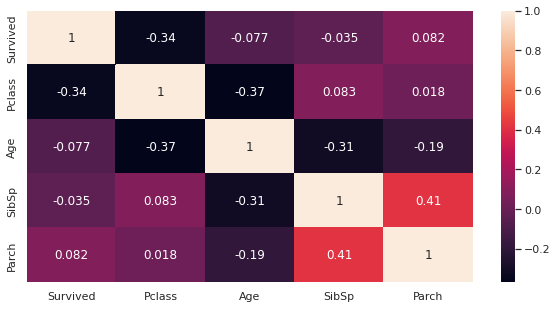

In [ ]:
import seaborn as sns
correlation =df_titanic.corr()
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(correlation, annot=True)
plt.show()

Most of the passengers are of 24.0 years


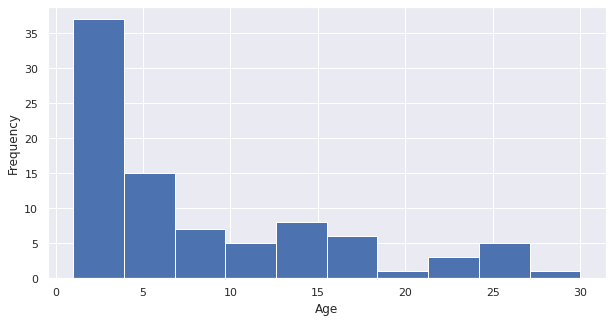

In [ ]:
#df_titanic.Age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_Age')
df_titanic['Age'].value_counts().plot(kind='hist')
print("Most of the passengers are of", df_titanic['Age'].value_counts().idxmax(), "years")

# **Data Preprocessing**

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_titanic['Sex']= label_encoder.fit_transform(df_titanic['Sex'])
df_titanic['Embarked']= label_encoder.fit_transform(df_titanic['Embarked'])
print(df_titanic.info())

df_titanic['Age'].fillna(df_titanic['Age'].mode()[0] , inplace = True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0] , inplace = True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB
None


In [ ]:
#checking for null values
print(df_titanic.isnull().sum())
y=df_titanic['Survived']
df=df_titanic.drop("Survived",axis=1)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,0,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,0,2
4,3,1,35.0,0,0,2


# **Feature Selection**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve , roc_auc_score

In [ ]:
#Finding AUC score by defining a function
def fun_AUC(data_frame):#data_frame is passed during function call
  data_frame= data_frame.drop("A",axis=1)
  X_train, X_test, y_train, y_test = train_test_split(data_frame,y,test_size=0.30,random_state=42)  
  stdsclr = StandardScaler()    
  x_train = stdsclr.fit_transform(X_train)      
  x_test_scaled = stdsclr.transform(X_test) 
  logistic_reg = LogisticRegression()          
  logistic_reg.fit(x_train,y_train) #training the model 
  y_predicted = logistic_reg.predict(x_test_scaled) # predicting the output by giving input to the model
  # The predict() method is used by all supervised estimators to forecast the real label for fresh data.
  log_probs = logistic_reg.predict_proba(x_test_scaled)
  # For each data point, the predict proba method returns the class probabilities. 
  log_probs = log_probs[:, 1]
  log_auc = roc_auc_score(y_test, log_probs)

  return log_auc

In [ ]:
#taking combinations of columns to make new features
#we need to find those combination of features which gives best AUC score 
lst_cols = list(df.columns)
dct={}
for i in range(6):
  dct[i]=lst_cols[i]
from itertools import combinations
col_comb=[]   # col_comb = list of columns combinations
for i in range(1,7):
  comb = list(combinations([0,1, 2, 3,4,5], i))
  col_comb.append(comb)
print(col_comb)
print(dct)

[[(0,), (1,), (2,), (3,), (4,), (5,)], [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)], [(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 3, 4), (0, 3, 5), (0, 4, 5), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)], [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 4, 5), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 4, 5), (0, 3, 4, 5), (1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5)], [(0, 1, 2, 3, 4), (0, 1, 2, 3, 5), (0, 1, 2, 4, 5), (0, 1, 3, 4, 5), (0, 2, 3, 4, 5), (1, 2, 3, 4, 5)], [(0, 1, 2, 3, 4, 5)]]
{0: 'Pclass', 1: 'Sex', 2: 'Age', 3: 'SibSp', 4: 'Parch', 5: 'Embarked'}


In [ ]:
#creating a new dataframe and finding the dataset that gives best AUC score
new_df = pd.DataFrame(columns=['A'])
maxm=0
maxm_df = df_titanic
for i in col_comb:
   #for accessing the lists inside combination of columnns 
  for j in i:
     #accessing the tuples inside each list of columns
    new_df = pd.DataFrame(columns=['A'], index=range(1, 891))
    for k in j: 
      #accessing each column in each tuple of each list in columns
      new_df=pd.concat([df_titanic[dct[k]],new_df],axis =1)
    temp=fun_AUC(new_df) #obtaining the AUC score for every dataset that we prepare  
    new_df= new_df.drop("A",axis=1) #dropping "A" from our dataset
    if(temp>maxm): 
      maxm= temp #Stores the maxmimum AUC score
      maxm_df = new_df #storing the dataset with highest AUC score in maxm_df 

In [ ]:
data=maxm_df
log_reg = LogisticRegression()
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(data,y,test_size=0.30,random_state=42) 
stdsclr = StandardScaler()    
X_TRAIN = stdsclr.fit_transform(X_TRAIN)   
X_TEST = stdsclr.transform(X_TEST)        
log_reg.fit(X_TRAIN,Y_TRAIN)
predictions = log_reg.predict(X_TEST)
log_probs = log_reg.predict_proba(X_TEST)
log_probs = log_probs[:, 1]
log_auc = roc_auc_score(Y_TEST, log_probs)

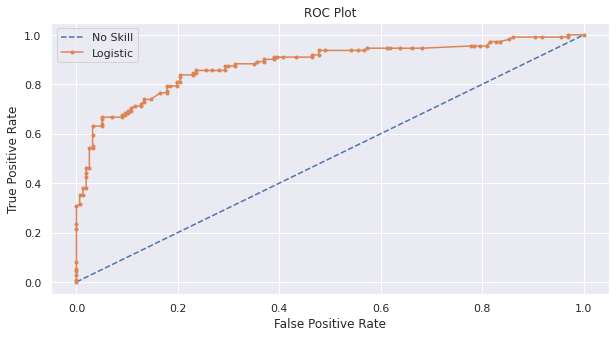

Logistic: ROC AUC=0.879
No Skill: ROC AUC=0.500


,Embarked,SibSp,Age,Sex,Pclass
0,2,1,22.0,1,3
1,0,1,38.0,0,1
2,2,0,26.0,0,3
3,2,1,35.0,0,1
4,2,0,35.0,1,3
...,...,...,...,...,...
886,2,0,27.0,1,2
887,2,0,19.0,0,1
888,2,1,24.0,0,3
889,0,0,26.0,1,1


In [ ]:
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(Y_TEST))]

NS_AUC = roc_auc_score(Y_TEST, ns_probs) #ns = no skill 
NS_FPR, NS_TPR, threshold = roc_curve(Y_TEST, ns_probs)
LR_FPR, LR_TPR, threshold = roc_curve(Y_TEST, log_probs)


# plotting the ROC curve for the model
pyplot.plot(NS_FPR, NS_TPR, linestyle='--', label='No Skill')
pyplot.plot(LR_FPR, LR_TPR, marker='.', label='Logistic')

plt.title('ROC Plot')
# x and y axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()      
log_auc = roc_auc_score(Y_TEST, log_probs)
print('Logistic: ROC AUC=%.3f' % (maxm))
print('No Skill: ROC AUC=%.3f' % (NS_AUC))
display(maxm_df)

### **Did you find this approach greedy?**

+ We are using Exhaustive feature selection method in our above approach.It is one of the most greedy selection methods, which evaluates each feature set as brute-force. It tries & makes each possible combination of features and returns the best performing feature set. **Hence, our approach is greedy**